<a href="https://colab.research.google.com/github/woo2201/sampleCases/blob/reservior/Timeseries_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/dataset/StoreSales/store-sales-time-series-forecasting/

/content/gdrive/MyDrive/dataset/StoreSales/store-sales-time-series-forecasting


In [3]:
# import necessary packages

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

import glob
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [113]:
path = "/content/gdrive/MyDrive/dataset/StoreSales/store-sales-time-series-forecasting/"
filenames = glob.glob(path + "*.csv")
data = [var.split('.')[0].split('/')[-1] for var in filenames]

In [114]:
# dynamically allocate df names.
for name in zip(filenames, data):
        loc = list(name)[0]
        val = list(name)[1]
        globals()[val] = pd.read_csv(loc)

What files do I have? 

In [110]:
data

['stores',
 'sample_submission',
 'holidays_events',
 'oil',
 'test',
 'train',
 'transactions']

There are some missing days in between in Oil dataset.
So fill 'em up.

In [115]:
oil['date'] = oil['date'].astype('datetime64[ns]')

idx = pd.date_range(start = '2013-01-01',
                    end = '2017-08-31',
                    freq = "D") 

oil = (pd.DataFrame({'date' : idx})
            .merge(oil,
                left_on = 'date',
                right_on = 'date',
                how = 'left')
       )

oil.fillna(method='bfill', inplace=True)

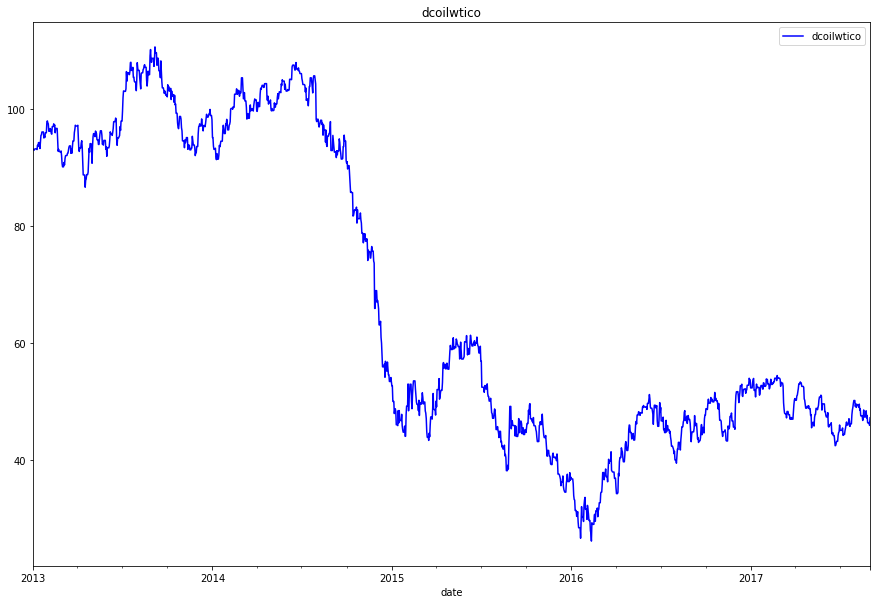

In [119]:
fig, axes = plt.subplots(figsize=(15,10))

oil.plot.line(x = "date",
              y = "dcoilwtico", 
              color = 'b',
              title ="dcoilwtico",
              ax = axes)
plt.show()

Now, we can add up holiday information to the oil dates since oil dates covers up the entire dates range we intend to use.

Below are some useful information.

    Holidays and Events, with metadata
    NOTE: Pay special attention to the transferred column. 
    A holiday that is transferred officially falls on that calendar day,
    but was moved to another date by the government.
    A transferred day is more like a normal day than a holiday.
    To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.
    For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12
    which means it was celebrated on 2012-10-12.
    Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend).
    These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
    Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [125]:
holidays_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [130]:
# since we know transferred days are not like typical holidays it says.
holidays_events = holidays_events[holidays_events.transferred == False]
holidays_events['date'] = holidays_events['date'].astype('datetime64[ns]')

In [135]:
# these are all i need.
holidays_events = holidays_events[['date','type','locale','locale_name']]

# transactions?

In [140]:
transactions['date'] = transactions['date'].astype('datetime64[ns]')

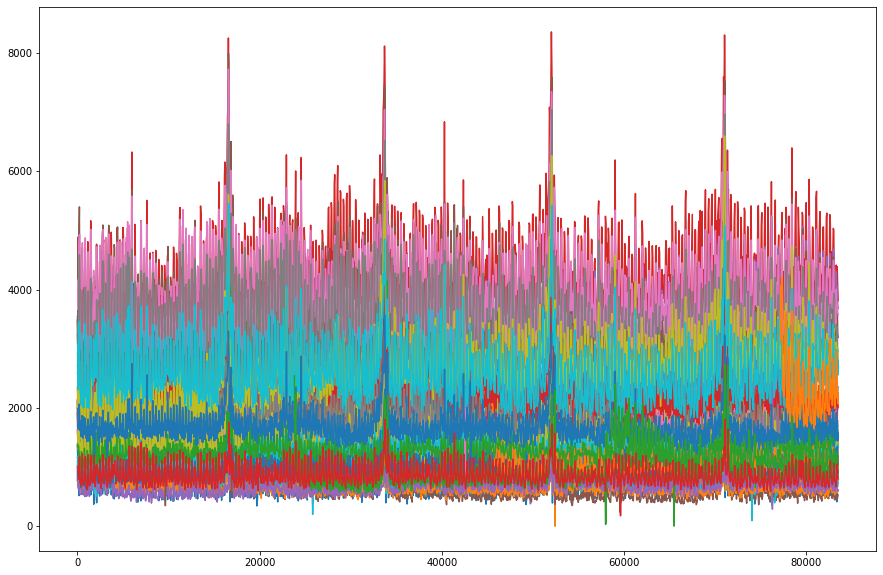

In [139]:
fig, axes = plt.subplots(figsize=(15,10))

sns.set(style='darkgrid')
sns.lineplot(x = 'date',
             y = 'transactions', data=transactions)

출처: https://coding-grandpa.tistory.com/entry/PythonSeaborn-Seaborn-필수-그래프-정리-Line-plot과-Scatter-plot [개발자로 취직하기]

plt.show()


jump to the train set first.

In [133]:
train['date'] = train['date'].astype('datetime64[ns]')